In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('indiancrop_dataset.csv')
df.head()

N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
0      90      42      43    20.879744  82.002744  6.502985  202.935536   
1      85      58      41    21.770462  80.319644  7.038096  226.655537   
2      60      55      44    23.004459  82.320763  7.840207  263.964248   
3      74      35      40    26.491096  80.158363  6.980401  242.864034   
4      78      42      42    20.130175  81.604873  7.628473  262.717340   

                 STATE  CROP_PRICE  CROP  
0  Andaman and Nicobar        7000  Rice  
1  Andaman and Nicobar        5000  Rice  
2  Andaman and Nicobar        7000  Rice  
3  Andaman and Nicobar        7000  Rice  
4  Andaman and Nicobar      120000  Rice

In [3]:
df['STATE'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [4]:
df.tail()

N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
2195     107      34      32    26.774637  66.413269  6.780064  177.774507   
2196      99      15      27    27.417112  56.636362  6.086922  127.924610   
2197     118      33      30    24.131797  67.225123  6.362608  173.322839   
2198     117      32      34    26.272418  52.127394  6.758793  127.175293   
2199     104      18      30    23.603016  60.396475  6.779833  140.937041   

            STATE  CROP_PRICE    CROP  
2195  West Bengal        1000  Coffee  
2196  West Bengal         800  Coffee  
2197  West Bengal         560  Coffee  
2198  West Bengal        1500  Coffee  
2199  West Bengal        1400  Coffee

In [5]:
df.shape

(2200, 10)

In [3]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [11]:
df.describe().T

count         mean          std        min         25%  \
N_SOIL       2200.0    50.551818    36.917334   0.000000   21.000000   
P_SOIL       2200.0    53.362727    32.985883   5.000000   28.000000   
K_SOIL       2200.0    48.149091    50.647931   5.000000   20.000000   
TEMPERATURE  2200.0    25.616244     5.063749   8.825675   22.769375   
HUMIDITY     2200.0    71.481779    22.263812  14.258040   60.261953   
ph           2200.0     6.469480     0.773938   3.504752    5.971693   
RAINFALL     2200.0   103.463655    54.958389  20.211267   64.551686   
CROP_PRICE   2200.0  2689.228182  3710.361267   2.000000  950.000000   

                     50%          75%            max  
N_SOIL         37.000000    84.250000     140.000000  
P_SOIL         51.000000    68.000000     145.000000  
K_SOIL         32.000000    49.000000     205.000000  
TEMPERATURE    25.598693    28.561654      43.675493  
HUMIDITY       80.473146    89.948771      99.981876  
ph              6.425045     6.923643       9.935091  
RAINFALL       94.867624   124.267508     298.560117  
CROP_PRICE   1825.000000  3500.000000  120000.000000

In [12]:
df.describe(include='all').T

count unique            top freq         mean          std  \
N_SOIL       2200.0    NaN            NaN  NaN    50.551818    36.917334   
P_SOIL       2200.0    NaN            NaN  NaN    53.362727    32.985883   
K_SOIL       2200.0    NaN            NaN  NaN    48.149091    50.647931   
TEMPERATURE  2200.0    NaN            NaN  NaN    25.616244     5.063749   
HUMIDITY     2200.0    NaN            NaN  NaN    71.481779    22.263812   
ph           2200.0    NaN            NaN  NaN      6.46948     0.773938   
RAINFALL     2200.0    NaN            NaN  NaN   103.463655    54.958389   
STATE          2200     26  Uttar Pradesh  574          NaN          NaN   
CROP_PRICE   2200.0    NaN            NaN  NaN  2689.228182  3710.361267   
CROP           2200     22           Rice  100          NaN          NaN   

                   min        25%        50%         75%         max  
N_SOIL             0.0       21.0       37.0       84.25       140.0  
P_SOIL             5.0       28.0       51.0        68.0       145.0  
K_SOIL             5.0       20.0       32.0        49.0       205.0  
TEMPERATURE   8.825675  22.769375  25.598693   28.561654   43.675493  
HUMIDITY      14.25804  60.261953  80.473146   89.948771   99.981876  
ph            3.504752   5.971693   6.425045    6.923643    9.935091  
RAINFALL     20.211267  64.551686  94.867624  124.267508  298.560117  
STATE              NaN        NaN        NaN         NaN         NaN  
CROP_PRICE         2.0      950.0     1825.0      3500.0    120000.0  
CROP               NaN        NaN        NaN         NaN         NaN

In [13]:
print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values for categorical columns:
STATE: ['Andaman and Nicobar' 'Andhra Pradesh' 'Assam' 'Chattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Nagaland'
 'Odisha' 'Pondicherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttrakhand' 'West Bengal']
CROP: ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


# EDA

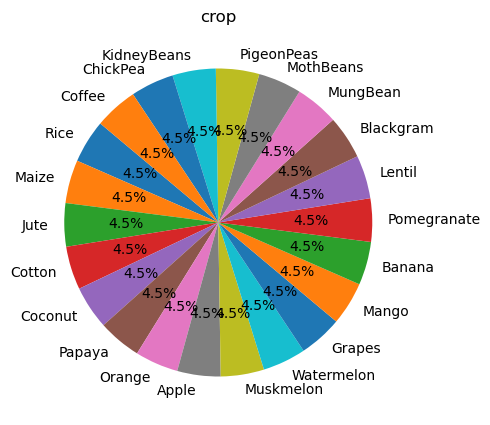

In [15]:
crop = df['CROP'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(crop, labels=crop.index, autopct='%1.1f%%', startangle=140)
plt.title('crop')
plt.show()

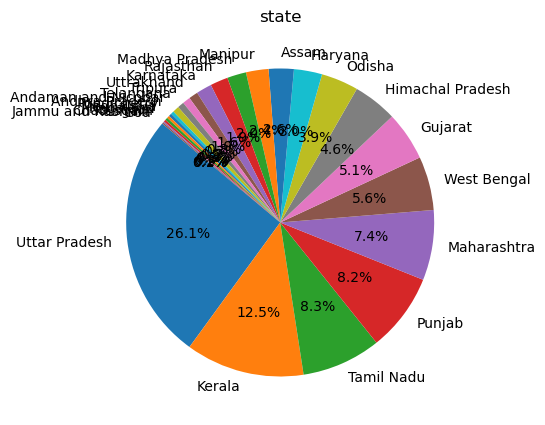

In [27]:
state = df['STATE'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(state, labels=state.index, autopct='%1.1f%%', startangle=140)
plt.title('state')
plt.show()

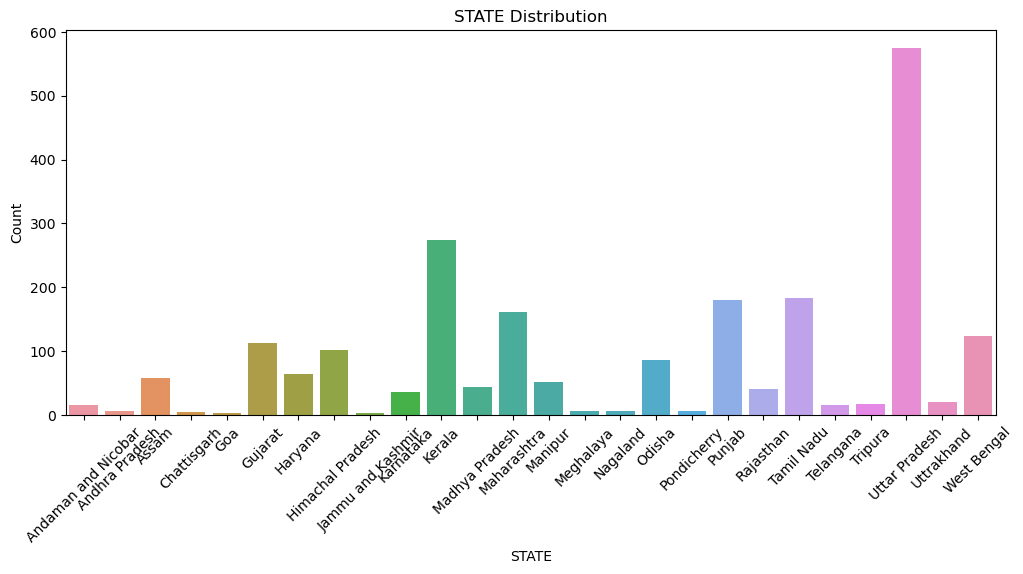

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='STATE', data=df)
plt.title('STATE Distribution')
plt.xlabel('STATE')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotation set to 0 for horizontal labels
plt.show()

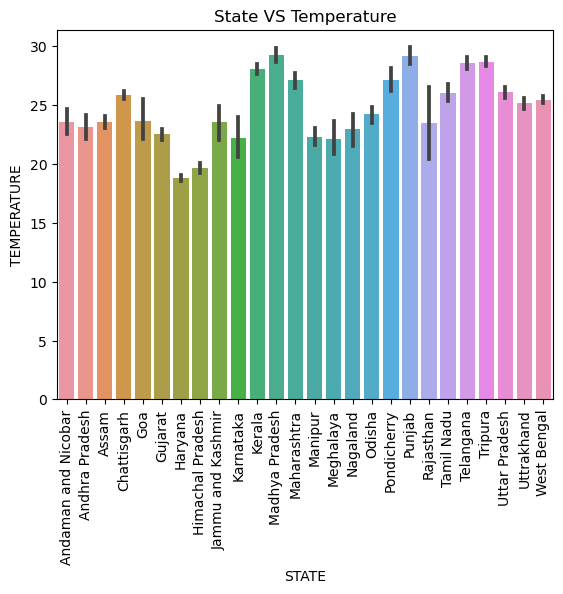

In [37]:
sns.barplot(x='STATE', y='TEMPERATURE', data=df)
plt.xlabel('STATE')
plt.ylabel('TEMPERATURE')
plt.title('State VS Temperature')
plt.xticks(rotation=90)
plt.show()

In [33]:
df.columns

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='CROP', data=df)
plt.title('CROP Distribution')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotation set to 0 for horizontal labels
plt.show()

Skewness Value : 0.5097213691539147


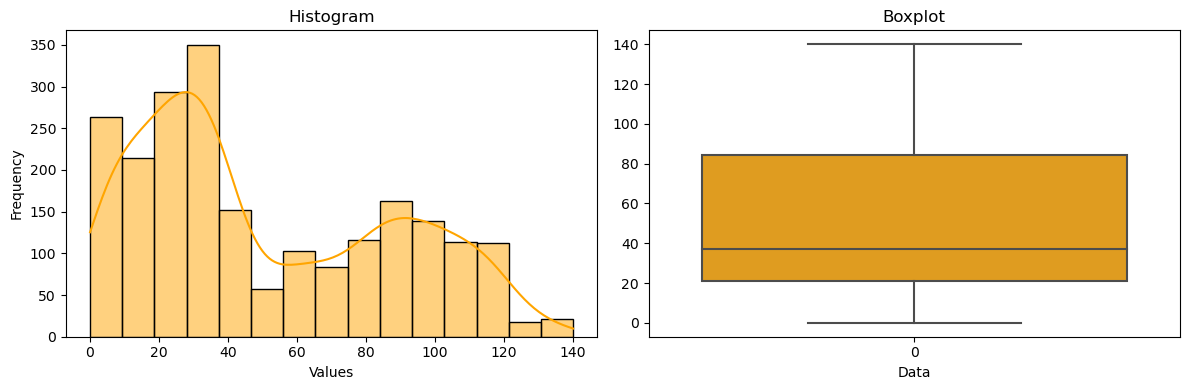

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['N_SOIL'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['N_SOIL'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['N_SOIL'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 1.0107725431372674


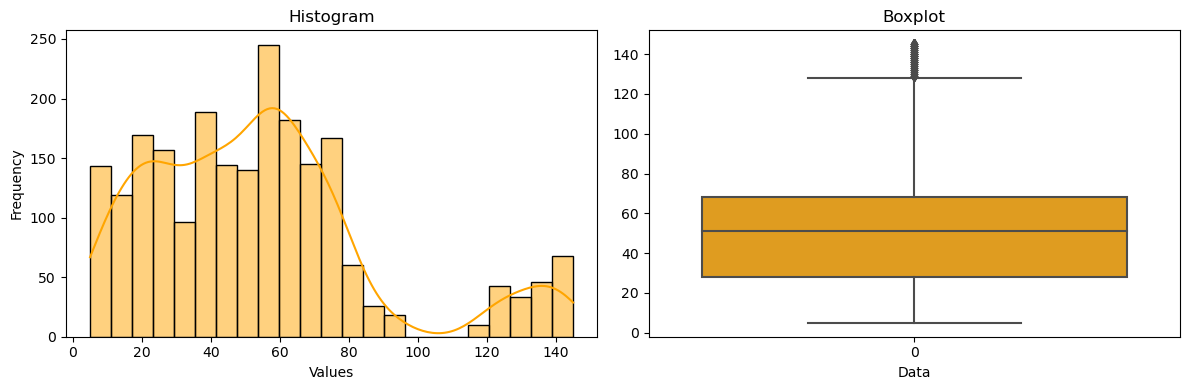

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['P_SOIL'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['P_SOIL'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['P_SOIL'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 2.3751672388547


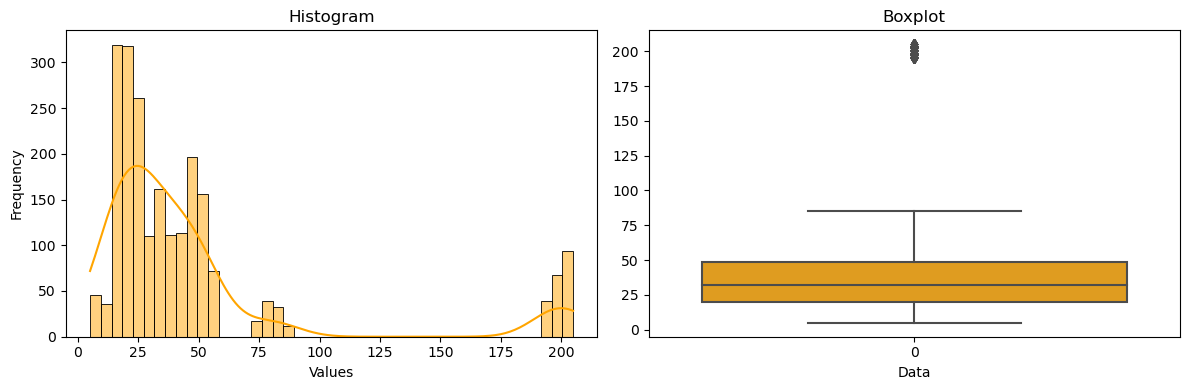

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['K_SOIL'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['K_SOIL'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['K_SOIL'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.18493273421137887


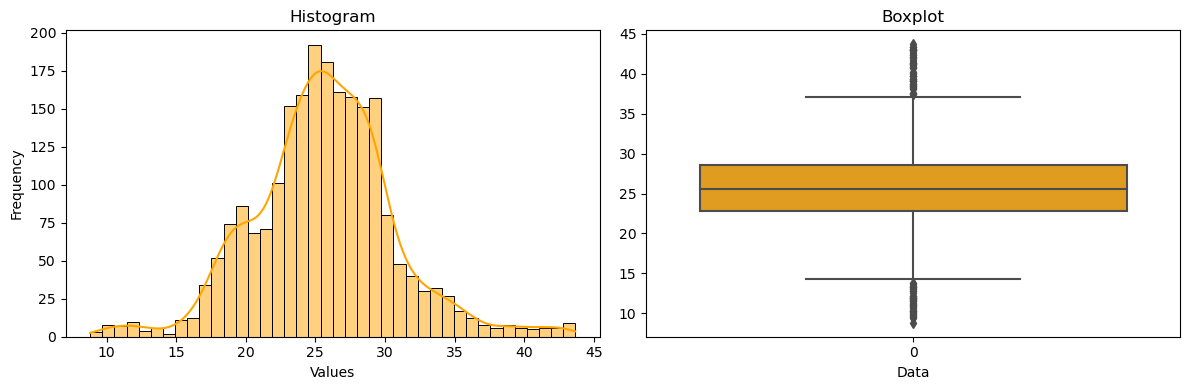

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['TEMPERATURE'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['TEMPERATURE'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['TEMPERATURE'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : -1.0917079195808679


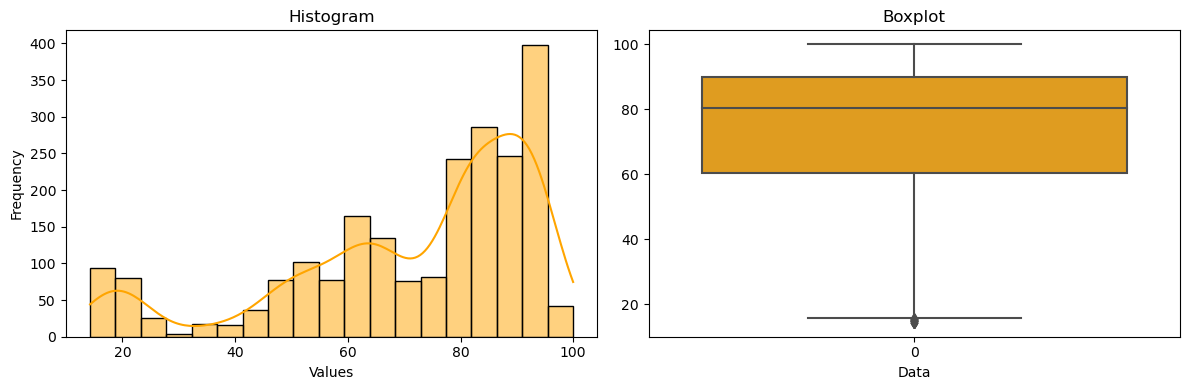

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['HUMIDITY'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['HUMIDITY'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['HUMIDITY'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.2839294375729443


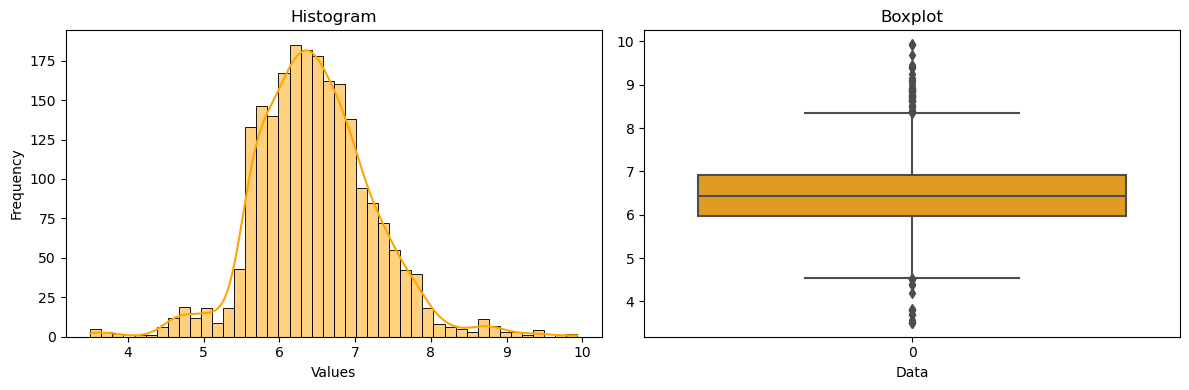

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['ph'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['ph'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['ph'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.9657563536272812


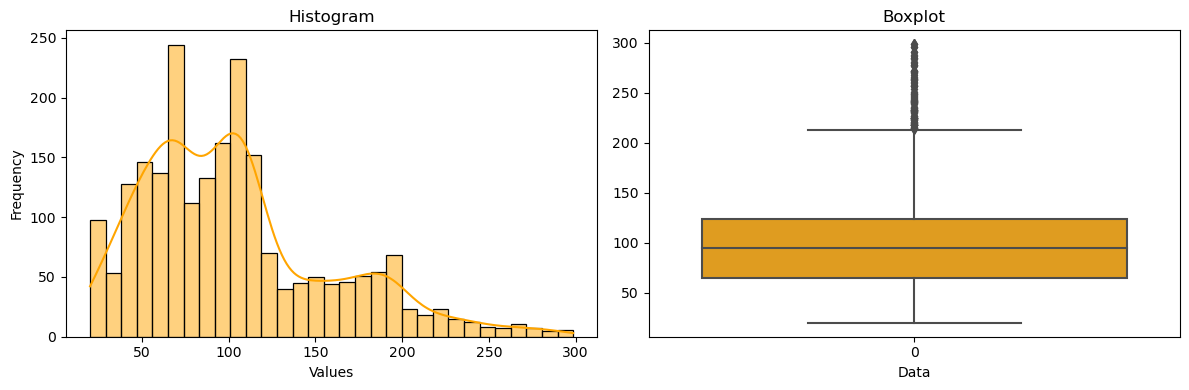

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['RAINFALL'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['RAINFALL'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['RAINFALL'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 15.926745231743062


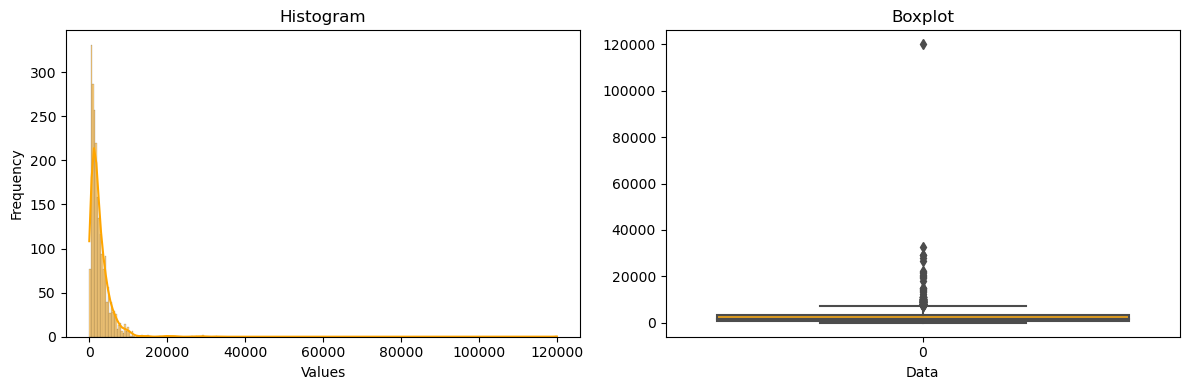

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['CROP_PRICE'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['CROP_PRICE'], kde=True, color= 'orange', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['CROP_PRICE'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['STATE'] = encoder.fit_transform(df['STATE'])


In [9]:
df['STATE'].tail(5)

2195    25
2196    25
2197    25
2198    25
2199    25
Name: STATE, dtype: int32

In [10]:
df['STATE'].value_counts()

STATE
23    574
10    274
20    183
18    180
12    162
25    124
5     113
7     102
16     86
6      65
2      58
13     52
11     44
19     41
9      36
24     21
22     18
21     15
0      15
1       7
17      7
14      6
15      6
3       5
8       3
4       3
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CROP'] = le.fit_transform(df[['CROP']])

In [12]:
df['CROP'].value_counts()

CROP
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [13]:
df['STATE'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [14]:
df['CROP'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [42]:
df.head()

N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
0      90      42      43    20.879744  82.002744  6.502985  202.935536   
1      85      58      41    21.770462  80.319644  7.038096  226.655537   
2      60      55      44    23.004459  82.320763  7.840207  263.964248   
3      74      35      40    26.491096  80.158363  6.980401  242.864034   
4      78      42      42    20.130175  81.604873  7.628473  262.717340   

   STATE  CROP_PRICE  CROP  
0    0.0        7000    20  
1    0.0        5000    20  
2    0.0        7000    20  
3    0.0        7000    20  
4    0.0      120000    20

# Model Building

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression

In [17]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9869318181818182
Test Accuracy Score : 0.975
Cross validation Score : 0.9813636363636364
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00       

# KNN

In [18]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9960227272727272
Test Accuracy Score : 0.975
Cross validation Score : 0.9913636363636364
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       0.96      1.00      0.98        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      0.94      0.97        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       0.95      1.00      0.98        20
          10       0.69      1.00      0.81        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       0.95      0.79      0.86        24
          14       1.00      1.00      1.00       

# Support Vector Machine (SVM)

In [19]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9971590909090909
Test Accuracy Score : 0.9840909090909091
Cross validation Score : 0.9913636363636364
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       0.96      1.00      0.98        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       0.95      1.00      0.98        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00    

# Decision Tree Classification

In [20]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 1.0
Cross validation Score : 0.9931818181818182
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15 

# Random Forest Classifier

In [21]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""
model=RandomForestClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 1.0
Cross validation Score : 1.0
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00     

# Ada Boost Classifier

In [23]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)





model=AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
#print("classification Report :\n",cr)

Train Accuracy Score : 0.14488636363636365
Test Accuracy Score : 0.10227272727272728
Cross validation Score : 0.24818181818181814


# Gradient Boost Classifier

In [24]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)





model=GradientBoostingClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.975
Cross validation Score : 0.9904545454545455
confusion matrix :
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 24  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0 

# Exstrem gradient boosting Classifier (XGB)

In [ ]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)





model=XGBClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
#print("classification Report :\n",cr)

# Hence we choose support vector machine classification algorithm as my final  model

In [26]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
y=df['CROP']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
#print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9971590909090909
Test Accuracy Score : 0.9840909090909091
Cross validation Score : 0.9913636363636364
classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       0.96      1.00      0.98        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       0.95      1.00      0.98        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00    

In [25]:
x.head()

N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  STATE
0      90      42      43    20.879744  82.002744  6.502985  202.935536      0
1      85      58      41    21.770462  80.319644  7.038096  226.655537      0
2      60      55      44    23.004459  82.320763  7.840207  263.964248      0
3      74      35      40    26.491096  80.158363  6.980401  242.864034      0
4      78      42      42    20.130175  81.604873  7.628473  262.717340      0

In [17]:
x=df.drop(columns=['CROP_PRICE','CROP'],axis=1)
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(df[['CROP']])

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

tf1 = ColumnTransformer([('Encoder', OneHotEncoder(sparse=False,drop='first'), 
                          [7])],remainder='passthrough')
tf2 = ColumnTransformer([('Scaler', StandardScaler(), slice(0, 7))])
tf3=SVC()
pipe=make_pipeline(tf1,tf2,tf3)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_pred,y_test)


0.18409090909090908

In [16]:
df.columns

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('Crop.pkl','wb'))

In [ ]:
Crop_model=pickle.load(open('Crop.pkl','rb'))
test_input =[90,42,43,20.879744,82.002744,6.502985,202.935536,'Andaman and Nicobar']
test_input = np.array(test_input).reshape(1, -1)
output=Crop_model.predict(test_input)
category_mapping = {
    0: "Category 0",
    1: "Category 1",
    2: "Category 2",
    # Add more entries for other categories
    24: "Category 24",
}

for label in output:
    if label in category_mapping:
        print(category_mapping[label])
    else:
        print("Unknown category")